<a href="https://colab.research.google.com/github/changsin/CV/blob/main/01_30_image_filtering_pyramids_Gaussian_pyramid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image filtering: pyramids: Gaussian pyramid

The following are exercises done for Hany Faird's [Computer Vision course](https://youtube.com/playlist?list=PLhwIOYE-ldwL6h-peJADfNm8bbO3GlKEy&si=sXmtTvaJDQb6QD20)

#01-30 [Image filtering: pyramids: Gaussian pyramid](https://www.youtube.com/watch?v=1GFQ4V8cV0o&list=PLhwIOYE-ldwL6h-peJADfNm8bbO3GlKEy&index=30).


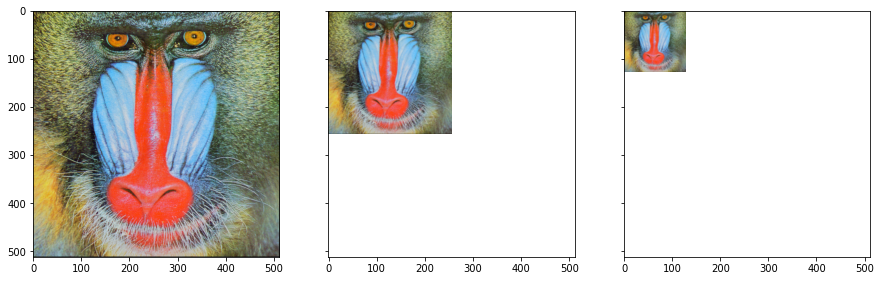

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import sepfir2d

im = plt.imread("/content/mandrill.png")

h = [1/16, 4/16, 6/16, 4/16, 1/16] # blur filter
N = 3 # number of pyramid levels

P = []
P.append(im) # first pyramid level
for k in range(1, N): # build pyramids
  im2 = np.zeros( im.shape )
  for z in range(3):
    im2[:,:,z] = sepfir2d( im[ :, :, z], h, h) # blur each color channel
  im2 = im2[:-1:2, 0:-1:2, :] # down-sample
  im = im2
  P.append(im2)


# display pyramid
fig, ax = plt.subplots(nrows=1, ncols=N, figsize=(15,7), dpi=72,
                       sharex=True, sharey=True)
for k in range(N-1, -1, -1):
  ax[k].imshow(P[k])